In [1]:
%%capture
!pip install PIL
!pip install tensorflow
!pip install keras

35363/35363 [==============================] - 0s 0us/step
predicted object is:
airliner
with accuracy
71.6540515422821


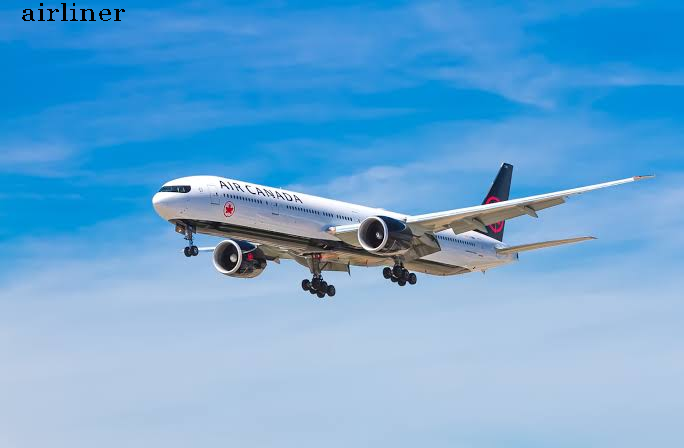

In [2]:
from keras.applications import VGG19
from keras.applications import imagenet_utils
from keras_preprocessing.image import img_to_array, load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

#loading the image to predict
try:
   img_path = '/content/drive/MyDrive/Colab_Notebooks/Image/test5.jpg'
   img = load_img(img_path)
except Exception as e:
    print(str(e))   
# img_path = 'Image/test6.jpg'
# img = load_img(img_path)
 
#resize the image to 224x224 square shape
try:
  img = img.resize((224,224))
except Exception as e:
  print(str(e))   
finally:   
   #convert the image to array
  img_array = img_to_array(img) 

#convert the image into a 4 dimensional Tensor
#convert from (height, width, channels), (batchsize, height, width, channels)
img_array = np.expand_dims(img_array, axis=0)

#preprocess the input image array
img_array = imagenet_utils.preprocess_input(img_array)

#Load the model from internet / computer
#approximately 530 MB
pretrained_model = VGG19(weights="imagenet")

#predict using predict() method
prediction = pretrained_model.predict(img_array)

#decode the prediction
actual_prediction = imagenet_utils.decode_predictions(prediction)

print("predicted object is:")
print(actual_prediction[0][0][1])
print("with accuracy")
print(actual_prediction[0][0][2]*100)

#display image and the prediction text over it
disp_img = cv2.imread(img_path)
#display prediction text over the image
cv2.putText(disp_img, actual_prediction[0][0][1], (20,20), cv2.FONT_HERSHEY_TRIPLEX , 0.8, (0,0,0))
#show the image
cv2_imshow(disp_img)

#Mobilenetssd Object detection

In [4]:
from keras.applications import Xception
from keras.applications import imagenet_utils
from keras_preprocessing.image import img_to_array, load_img
from keras.applications.inception_v3 import preprocess_input
import numpy as np
import cv2

# load the image to detect, get width, height 
# resize to match input size, convert to blob to pass into model
img_to_detect = cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Image/scene7.jpg')
img_height = img_to_detect.shape[0]
img_width = img_to_detect.shape[1]
resized_img_to_detect = cv2.resize(img_to_detect,(300,300))
img_blob = cv2.dnn.blobFromImage(resized_img_to_detect,0.007843,(300,300),127.5)